# Project1-Group17

## 0. Data Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [7]:
origin = pd.read_csv('results-2021-12-18.csv')
origin

,algorithm,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),datatype,accuracy,precision,recall,f1
0,AdaBoost,2.1,103,2,2730,8169,0.012593,1.638312,1.037993,2.012923,0.043739,1.489494,float64,0.960684,0.893617,0.802548,0.845638
1,Decision Tree,2.2,33,2,3900,2451,0.027051,1.431261,0.068482,1.506254,0.064431,1.478886,float64,0.963517,0.872146,0.852679,0.862302
2,SVM,2.2,15,22,3900,4084,0.018298,1.467225,0.530155,1.941215,0.303603,1.687695,float64,0.828349,0.431965,0.892857,0.582242
3,AdaBoost,2.2,112,1,3900,1633,0.026226,1.454106,0.243067,1.780723,0.093800,1.514068,float64,0.970096,0.910377,0.861607,0.885321
4,Bagging Classifier,2.2,138,6,3900,6535,0.027610,1.476311,0.699298,2.067553,0.056580,1.496940,float64,0.964115,0.910000,0.812500,0.858491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Random Forest,2.2,96,2,3900,4901,0.025976,1.473068,1.501089,2.928194,0.082175,1.543079,float64,0.978469,0.989583,0.848214,0.913462
3596,Bagging Classifier,2.1,126,20,1559,8169,0.006985,1.440221,0.170978,1.651912,0.037567,1.460747,float64,0.952167,0.926471,0.700000,0.797468
3597,SVM,2.2,17,19,3900,5718,0.090063,1.408732,1.108957,2.026484,0.488150,1.690740,float64,0.828349,0.431965,0.892857,0.582242
3598,Random Forest,2.1,86,18,1559,8169,0.007155,1.437659,0.581876,2.033274,0.046828,1.480216,float64,0.955157,1.000000,0.666667,0.800000


Set the size of the graph globally

In [42]:
size=()

In [43]:
def set_style(Size:str):
    global size
    size_dict={'small':(6,4),'medium':(9,6),'lager':(12,8)}
    size=size_dict[Size]

In [44]:
set_style('medium')

## 1. Perform an exploratory analysis of the dataset.

### 1.1 Number of Records with Specific Numeric Factors

In [8]:
# 统计 ("no_datapoints", "no_features")点对的分布情况
pairs_count = origin[["no_datapoints", "no_features"]].value_counts()
pairs_count

no_datapoints  no_features
3900           8169           360
               1633           180
               7352           180
               6535           180
               5718           180
               4901           180
               4084           180
               3268           180
               2451           180
389            8169           180
779            8169           180
3509           8169           180
3119           8169           180
2730           8169           180
2340           8169           180
1950           8169           180
1559           8169           180
1169           8169           180
3900           817            180
dtype: int64

In [9]:
# 将RQ2.1和RQ2.2的记录分别取出
rq2_1_dist = origin[origin["RQ"] == 2.1][["no_datapoints", "no_features"]].value_counts().index
rq2_2_dist = origin[origin["RQ"] == 2.2][["no_datapoints", "no_features"]].value_counts().index
rq2_1_dist

MultiIndex([( 389, 8169),
            ( 779, 8169),
            (1169, 8169),
            (1559, 8169),
            (1950, 8169),
            (2340, 8169),
            (2730, 8169),
            (3119, 8169),
            (3509, 8169),
            (3900, 8169)],
           names=['no_datapoints', 'no_features'])

In [10]:
# 将横纵坐标对绘制到图表对应位置
def show_num_dist(axes, pairs_data, label, dot_size=None, alpha=1):
    axes.scatter([x[0] for x in pairs_data], [x[1] for x in pairs_data], s=dot_size, alpha=alpha, label=label)

In [11]:
# 标示坐标对应位置数据值
def show_pair_cum(axes, pairs_data):
    for k, v in pairs_data.items():
        axes.text(k[0] + 50, k[1] - 250, v)

In [12]:
# 一个能把图表变得符合要求的函数
def optimize(axes, xlabel, ylabel):
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, rotation='horizontal', ha='right', y=1, va='bottom')

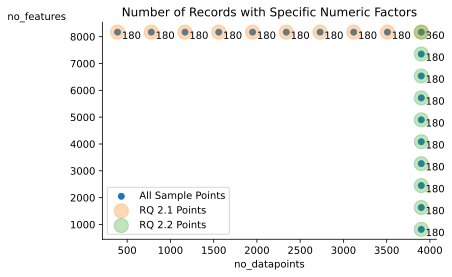

In [13]:
# 在平面直角坐标系中标示训练参数的分布情况
fig, ax = plt.subplots()

show_num_dist(ax, pairs_count.index, label="All Sample Points")
show_num_dist(ax, rq2_1_dist, alpha=0.3, dot_size=200, label="RQ 2.1 Points")
show_num_dist(ax, rq2_2_dist, alpha=0.3, dot_size=200, label="RQ 2.2 Points")
show_pair_cum(ax, pairs_count)
ax.legend()

ax.set_title("Number of Records with Specific Numeric Factors")
optimize(ax, "no_datapoints", "no_features")

### 1.2 Distribution of Algorithms in Dataset

In [14]:
algo_dist = origin[["algorithm", "RQ", "no_datapoints", "no_features"]]
algo_dist

,algorithm,RQ,no_datapoints,no_features
0,AdaBoost,2.1,2730,8169
1,Decision Tree,2.2,3900,2451
2,SVM,2.2,3900,4084
3,AdaBoost,2.2,3900,1633
4,Bagging Classifier,2.2,3900,6535
...,...,...,...,...
3595,Random Forest,2.2,3900,4901
3596,Bagging Classifier,2.1,1559,8169
3597,SVM,2.2,3900,5718
3598,Random Forest,2.1,1559,8169


In [15]:
algo_dist_2_1 = pd.DataFrame(algo_dist[algo_dist["RQ"] == 2.1][["algorithm", "no_datapoints"]].value_counts().sort_index(), columns=["count"])
algo_dist_2_2 = pd.DataFrame(algo_dist[algo_dist["RQ"] == 2.2][["algorithm", "no_features"]].value_counts().sort_index(), columns=["count"])

In [16]:
def show_algo_dist(ax, algo_samp, width):
    offset = -2.5
    groups = algo_samp.groupby("algorithm")
    for algo in algo_samp.value_counts("algorithm").index:
        data = groups.get_group(algo)
        ax.bar(np.array([x[1] for x in data.index]) + offset * width, [x[0] for x in data.values], width=width, label=algo)
        offset += 1

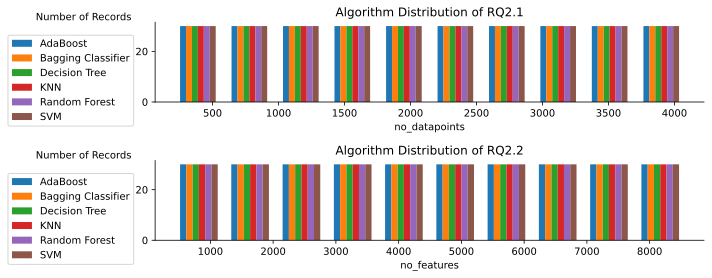

In [17]:
# 查看各采样点中不同算法的占比
fig, ax = plt.subplots(2, 1)
fig.set_figwidth(10)

# 首先对no_features值均为8169，即RQ2.1的采样点进行检查
show_algo_dist(ax[0], algo_dist_2_1, 45)
optimize(ax[0], "no_datapoints", "Number of Records")
ax[0].set_title("Algorithm Distribution of RQ2.1")
ax[0].legend(bbox_to_anchor=(-0.03, 0.9, 0, 0))

# 然后对no_datapoints值均为3900，即RQ2.2的采样点进行检查
show_algo_dist(ax[1], algo_dist_2_2, 100)
optimize(ax[1], "no_features", "Number of Records")
ax[1].set_title("Algorithm Distribution of RQ2.2")
ax[1].legend(bbox_to_anchor=(-0.03, 0.9, 0, 0))

fig.tight_layout()

### 1.3 "train_energy" Varying with "iteration"

1. This is a line graph, each line represents a different experiment
   + Line represents the relationship between  iterations and train energy within a experiment
   + X axis is the iterations number （every experiment have 30） Y axis is train energy(J)
2. As you can see, there is no specific pattern to the lines in the graph, which means
   +  iteration does not affect the magnitude of energy
   + we can treat each iteration as the same
   + we can use the mean of the 30 iterations to represent the experiment as a whole

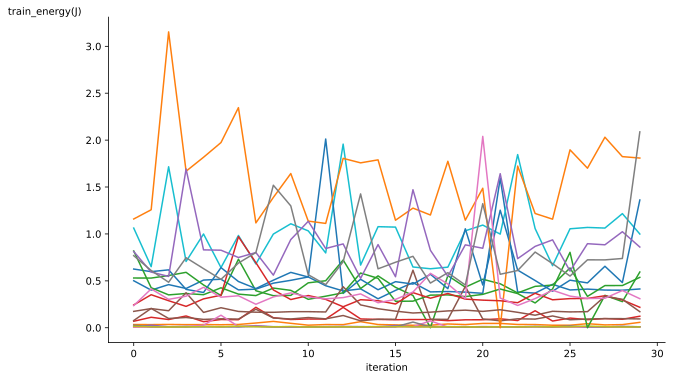

In [18]:
plt.figure(figsize=(10,6))
id_groupby=origin.groupby(origin['experiment_id'])
for times,total in enumerate(id_groupby):
    name1,group1 = total
    if times==120: break
    if times%7==0:sns.lineplot(x=range(30),y=group1['train_energy(J)'].values)
        
ax = plt.gca()
optimize(ax, "iteration", "train_energy(J)")

### 1.4 Precision versus Recall

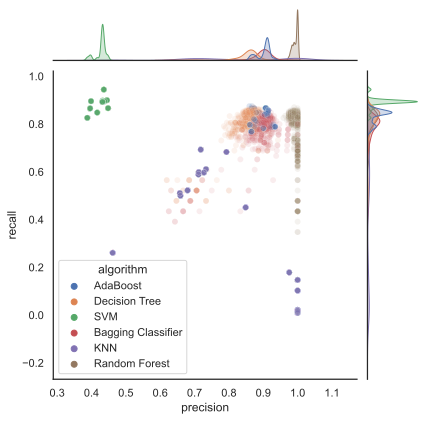

In [19]:
sns.set_theme(style="white")
sns.jointplot(data=origin, x="precision", y="recall", hue="algorithm", alpha=0.1);

### Conclusion:
+ Looking at the entire graph, the denseness of the dots in the upper right corner is much greater than the other dots. It indicates that these algorithms as a whole proceed in the direction of highprecision and highrecall.
+ For the algorithm AdaBoost, the precision generally lies around 0.9 and the recall generally lies around 0.8 and does not vary with the data.
+ For the algorithm Decision Tree, the precision generally lies around 0.8, slightly lower than the precision of the algorithm AdaBoost, but still excellent overall. recall generally lies around 0.8. And precision and recall do not change with the data.
+ For the algorithm SVM, the precision generally lies around 0.4, which is much lower than other types of algorithms. recall generally lies around 0.8. And precision and recall do not change with the data.
+ For the algorithm Bagging Classifier, it is more influenced by the data compared to the previous algorithms, but the overall trend is toward high precision and high recall, and most of the data are concentrated here.
+ For algorithm KNN, the overall trend is negative, and neither precision nor recall can reach a very high level.
+ For the algorithm Random Forest, the precision is always at a very high level, while the recall fluctuates a lot with the data.

### 1.5 predict_energy versus train_energy

In [20]:
data_energy = origin[["algorithm", "train_energy(J)", "predict_energy(J)"]].copy()
data_energy["ratio_energy"] = data_energy["predict_energy(J)"] / data_energy["train_energy(J)"]
data_energy

,algorithm,train_energy(J),predict_energy(J),ratio_energy
0,AdaBoost,1.037993,0.043739,0.042138
1,Decision Tree,0.068482,0.064431,0.940840
2,SVM,0.530155,0.303603,0.572669
3,AdaBoost,0.243067,0.093800,0.385902
4,Bagging Classifier,0.699298,0.056580,0.080909
...,...,...,...,...
3595,Random Forest,1.501089,0.082175,0.054744
3596,Bagging Classifier,0.170978,0.037567,0.219720
3597,SVM,1.108957,0.488150,0.440189
3598,Random Forest,0.581876,0.046828,0.080477


In [21]:
def draw_heap(axes, data, x, y, x_label, y_label, title):
    axes.plot(data[x], data[y], color="green")
    axes.fill_between(data[x], data[y], color="green")
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)

    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label) 

In [22]:
def draw_mult_heap(axes, data, x, y, x_label, y_label, titles):
    for index, algo in enumerate(data.value_counts(titles).index):
        data_needed_algo = data.groupby(titles).get_group(algo).sort_values(x)
        draw_heap(axes[index // 3][index % 3], data_needed_algo, x, y, x_label, y_label, algo)

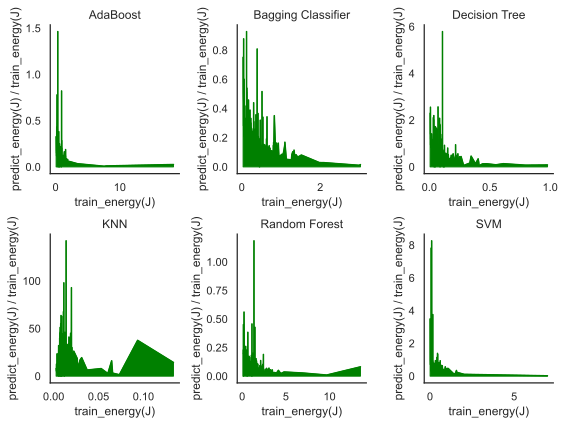

In [23]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(6)
fig.set_figwidth(8)

draw_mult_heap(ax, data_energy, "train_energy(J)", "ratio_energy", "train_energy(J)", "predict_energy(J) / train_energy(J)", "algorithm")

fig.tight_layout()

+ We want to explore the relationship between predict_energy(J) and train_energy(J) among the algorithms. The horizontal coordinate is train_energy(J), the vertical coordinate is quotient of predict_energy(J) and train_energy(J). Through the heat graph, we can easily know which model can be predicted well. That means,for one graph, if the ordinate of most of the points are located near 1, then the prediction of this algorithm is good.

## 2. Show How no_features Affects Energy Consumption of Algorithm SVM

In [24]:
def basic_process(dataset:pd.core.frame.DataFrame,_type,algorithm=None,column=['no_features','train_energy(J)']):
    '''
    Description: Preliminary processing of the given Dataframe
    Input:
        dataset:the original dataset or a similar dataset (In form of dataframe)
        _type: the data selected by experiment type (RQ2.1 / 2.2)
        algorithm: the algorithm to be selected (a list), if this parameter is not entered, all algorithms 
        will be selected
    Output: a processed DF
    '''
    result_list=list()
    if not algorithm: algorithm=list(dataset['algorithm'].unique())
    groupby_algorithm=dataset.query(f'RQ=={_type} and algorithm == {algorithm}').groupby(dataset['algorithm'])
    for name_group in groupby_algorithm: result_list.append(name_group[1])
    return pd.concat(result_list)#[column]

In [56]:
def draw_linepolt_withCI(resource:pd.core.frame.DataFrame,x_axis='no_features',y_axis='train_energy(J))'):
    '''
    Description: Draw a line graph with confidence intervals based on the given Dataframe and fields
    '''
    plt.figure(figsize=size)
    sns.lineplot(data=resource,x=x_axis,y=y_axis)
    ax = plt.gca()
    optimize(ax, x_axis, y_axis)

1. This graph is a line graph of the relationship between no_features and train_energy(J)
   + The x-axis is no_features, and the y-axis is train_energy(J)
   + The deep blue line (center line) is the mean value for 30 times iterations in an experiment
   + The light blue area represent the 95% confident interval
2. By the direction of the center line
   + We can see that the general trend is that as no_features increases, train_energy(J) increases as well
3. By focusing on the confidence interval
   +  we can see that the confidence interval when features=5000 is significantly larger than the other parts
     + Also means that the variance around this point is larger 
     + May means something wrong happen in this point, and value in here may not so credible
       + we can then run a few more tests for feature=5000 to determine whether the very large energy value at this point is a systematic error or a chance error

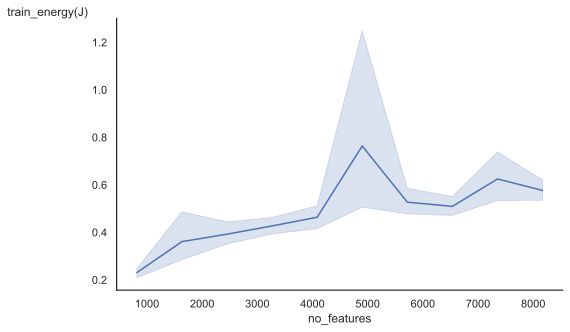

In [26]:
Parameters={
    'resource':basic_process(dataset=origin,algorithm=['SVM'],_type=2.2),
    'x_axis':'no_features',
    'y_axis':"train_energy(J)"
}
draw_linepolt_withCI(**Parameters)

## 3. Small Multiples Showing How no_datapoints & no_features Affect train_energy(J)

In [27]:
cols_needed = ["algorithm", "RQ", "no_datapoints", "no_features", "train_energy(J)"]
data_needed = origin[cols_needed]
conv_energy_avg = data_needed.groupby(cols_needed[:-1]).mean()[cols_needed[-1]]
list_energy_avg = [[a, r, d, f, e] for (a, r, d, f), e in conv_energy_avg.items()]
data_energy_avg = pd.DataFrame(list_energy_avg, columns=cols_needed)
data_energy_avg

,algorithm,RQ,no_datapoints,no_features,train_energy(J)
0,AdaBoost,2.1,389,8169,0.113206
1,AdaBoost,2.1,779,8169,0.181939
2,AdaBoost,2.1,1169,8169,0.292226
3,AdaBoost,2.1,1559,8169,0.294380
4,AdaBoost,2.1,1950,8169,0.393638
...,...,...,...,...,...
115,SVM,2.2,3900,4901,0.763848
116,SVM,2.2,3900,5718,0.527261
117,SVM,2.2,3900,6535,0.509580
118,SVM,2.2,3900,7352,0.624900


In [28]:
def multiplot(dataset:pd.core.frame.DataFrame,xaxis,yaxis,subplot):
    '''
    Description: Draw a multiple plots based on the input dataset
    Input: 
        dataset: a Dataframe to be used as resource
        x-axis: the field that will be used as x axis
        y-axis: the field that will be used as y axis
        subplot: the field to distinguish different subpolts
    Output: a mutiple_polt
    '''
    dataset=dataset.sort_values(by=xaxis)
    grid = sns.FacetGrid(dataset, col=subplot, hue=subplot, palette="tab20c",col_wrap=6, height=3)
    grid.map(plt.plot, xaxis, yaxis, marker="o")
    grid.fig.tight_layout(w_pad=2)

1. This is a multiple plot with 2 rows and 6 columns
   + each row represent a different method (RQ = 2.1 / 2.2)
   + each column represent a different algorithm
   + so we have 2*6=12 kind of subplots with different method and different algorithm
2. For every subplots
   + X axis is no_datapoints or no_features (depend on the method)
   + Y axis is train energy(J)
3. Subplot can reflect the relationship between 
   + If look at the multiple plot horizontally, we can compare the energy between every algorithm
     + For RQ = 2.2(Upper row), broadly speaking there is a gradual rise, with a small peak at 5000. Among them, Random tree have a rapid rise
     + For RQ = 2.1(Lower row), also gradually rising but more consistent, which means every time energy more larger than before. Which worth notice is, at the end of the AdaBoost's image has a near vertical rise, we should re-collect the data to determine whether this is a systematic error or a chance error
   + If look at the multiple plot vertically, we can compare the pattern of the line between different experiment method
     + The line above is steep, the line below is also steep. The line above is gentle and the line below is gentle too
       + means, The effect of datapoints and features on energy should be the same, there is no case where one has a large effect on energy and the other has a small effect on energy

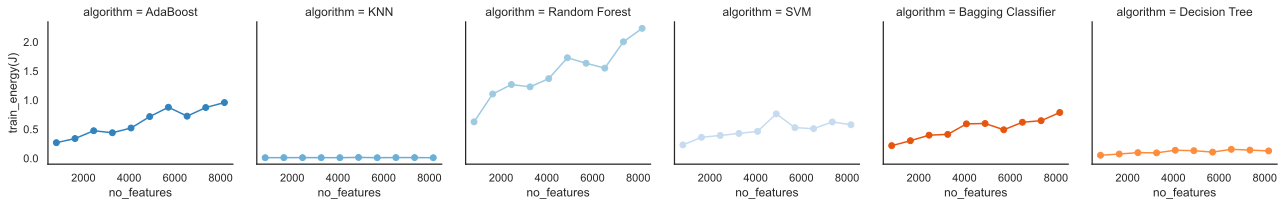

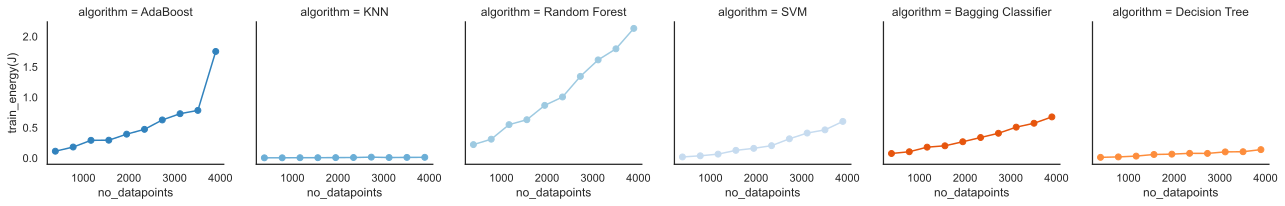

In [29]:
Parameters={
    "dataset": data_energy_avg[data_energy_avg["RQ"] == 2.2],
    "xaxis":"no_features",
    "yaxis":"train_energy(J)",
    "subplot":"algorithm"
}
multiplot(**Parameters)

Parameters={
    "dataset": data_energy_avg[data_energy_avg["RQ"] == 2.1],
    "xaxis":"no_datapoints",
    "yaxis":"train_energy(J)",
    "subplot":"algorithm"
}
multiplot(**Parameters)

## 4. Capture Most of the Insights of the Visualization in Requirement 3

In [30]:
def norm(seq):
    return seq / max(seq)

In [31]:
def draw_tree_left(axes, data, x, y, pos, color_trunk, color_branch):
    markerline, stemlines, baseline = axes.stem(
        data[y], pos + 0.8 * norm(data[x]), bottom=pos, linefmt=color_branch)
    markerline.set_color(color_branch)
    baseline.set_color(color_trunk)

In [32]:
def draw_tree_right(axes, data, x, y, pos, color_trunk, color_branch):
    markerline, stemlines, baseline = axes.stem(
        data[y], pos - 0.8 * norm(data[x]), bottom=pos, linefmt=color_branch)
    markerline.set_color(color_branch)
    baseline.set_color(color_trunk)

In [33]:
def draw_tree(axes, data_left, data_right, label_left, label_right, label_branch, pos, color_trunk, color_left, color_right):
    draw_tree_left(axes, data_left, label_left, label_branch, pos, color_trunk, color_left)
    draw_tree_right(axes, data_right, label_right, label_branch, pos, color_trunk, color_right)

In [49]:
def draw_forest(axes, data, judge, judge_left, judge_right, label_trees, label_left, label_right, label_trunk, color):
    data_left_groups = data[data[judge] == judge_left].groupby(label_trees)
    data_right_groups = data[data[judge] == judge_right].groupby(label_trees)
    name_trunks = data[label_trees].value_counts().index
    
    for index, algo in enumerate(name_trunks):
        data_left, data_right = data_left_groups.get_group(algo), data_right_groups.get_group(algo)
        draw_tree(axes, data_left, data_right, label_left, label_right, label_trunk, index * 2, color[0], color[1], color[2])
    
    axes.set_yticks([x * 2 for x in range(len(name_trunks))])
    axes.set_yticklabels(name_trunks)
    
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_xlabel(label_trunk)
    axes.set_ylabel(label_trees, rotation='horizontal', ha='right', y=1, va='bottom')
    
    custom_lines = [Line2D([0], [0], color=color[1], lw=4), Line2D([0], [0], color=color[2], lw=4)]
    ax.legend(custom_lines, [label_left, label_right])

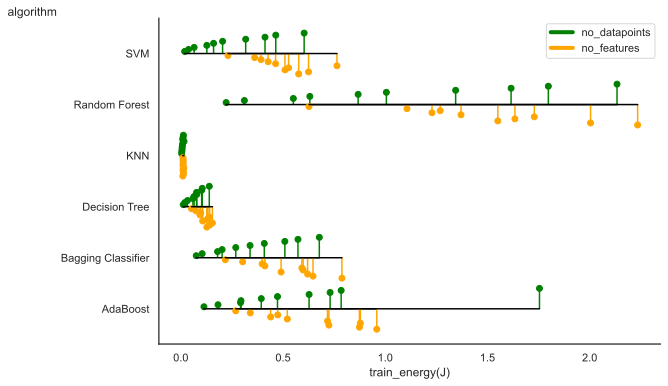

In [59]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"]=size

Parameters={
    'axes':ax, 'data':data_energy_avg,
    'judge':'RQ', 'judge_left':2.1,
    'judge_right':2.2, 'label_trees':'algorithm',
    'label_left':'no_datapoints', 'label_right':'no_features',
    'label_trunk':'train_energy(J)','color':["black", "green", "orange"]
    
}
draw_forest(**Parameters)

## 5. An Interesting Insight in the Data

In [36]:
def cal_Relevant(dataset:pd.core.frame.DataFrame,factor_1:str,factor_2:str):
    '''
    Description: find the correlation coefficient between two fields of some Dataframe (classified according to algorithm)
    Input: a Dataframe, with the names of the two fields in this DF
    Output: a Series with the name of the algorithm and the corresponding correlation coefficient
    '''
    result=pd.Series([factor_1+' with '+factor_2]) #添加相关系数的名字(哪两个字段的相关系数)
    for algorithm in dataset['algorithm'].unique():
        tempory=dataset[dataset['algorithm']==algorithm]
        result[algorithm]=pearsonr(tempory[factor_1],tempory[factor_2])[0]
    return result  # [1:]

In [37]:
def Turn_to_DF(Series1,Series2):
    '''
    Description: Converts two Series into a graph-friendly Dataframe
    Input: two Series derived from the cal_Relevant function
    Output: a graph-friendly Dataframe
    '''
    Type=([Series1[0]]*6)
    Type.extend([Series2[0]]*6)
    
    DF=pd.DataFrame(pd.concat([Series1[1:],Series2[1:]],axis=0))
    DF['algorithm']=DF.index
    DF['Type']=Type
    DF=DF.rename(columns={0:"Correlation coefficient"})
    
    return DF

In [63]:
Parameters={
    'Series1':cal_Relevant(basic_process(origin,_type=2.2),'no_features','train_energy(J)'),
    'Series2':cal_Relevant(basic_process(origin,_type=2.1),'no_datapoints','train_energy(J)')
}

In [39]:
def draw_Grouped_barplot(dataset:pd.core.frame.DataFrame,Interval=True):
    '''
    Description: Draw a cluster bar plot
    Input: a Dataframe, a parameter decide if draw the information about the interval
    Output: a cluster bar plot
    '''
    plt.figure(figsize=size)
    sns.barplot(data=dataset, x='algorithm', y='Correlation coefficient', hue='Type')
    
    ax = plt.gca()
    optimize(ax, 'algorithm', 'Correlation coefficient')
    if Interval:
        interval=[x/10 for x in range(2,12,2)]
        height=[x/10 for x in range(9,0,-2)]
        interval_name=['Highly linear correlation','Significant linear correlation',
                   'Moderate linear correlation','Low linearity correlation','No linear correlation']
    
        for height_line,Text,interval_line in zip(height,interval_name,interval):
            plt.axhline(y=interval_line,color=sns.color_palette("Paired")[8],linestyle='--')
            plt.text(5.75,height_line,Text,fontsize=12)

1. This is a cluster bar plot and have 6 clusters and each cluster have 2 bars
   + Every different cluster represent different algorithm
   + First bar in a cluster represent the correlation coefficient for "no_features" and "train_energy(J)" 
   + Second bar in a cluster represent the correlation coefficient for "no_datapoints" and "train_energy(J)" 
   + The bar's height just correspond to the value of correlation coefficient
2. Correlation coefficient is a numerical description
   + It represent the correlation between two linear data
   + This value between 0~1, the larger the value, the stronger the correlation
     + 0~1 can be divide into 4 level, so have different correlation description as you can see in the right of the graph
3. By focusing on the height of the bar
   + In general, the bar for "no_features" and "train_energy(J)" are short, so linear relationship between them  is not strong
   + In general, the bar for "no_datapoints" and "train_energy(J)" are high, so linear relationship between them  is  strong
     + Among them, Bagging Classifier, Decision Tree, Random Forest, SVM have a high correlation coefficient (between 0.6 and 0.8)
       + by definition there is a Significant linear correlation
       + means that as the value of no_datapoints increases, train_energy(J) also increases significantly
4. While most algorithms have an visible increase in train_energy(J) as no_datapoints or no_features increase, there is one exception.
   + KNN has a small correlation coefficient, which means that even if no_datapoints and no_features increase, the increase in train_energy(J) increases insignificantly
     + If our data includes a large number of datapoints and features, but we do not want the train_energy(J) to be too large, we can choose the KNN algorithm.

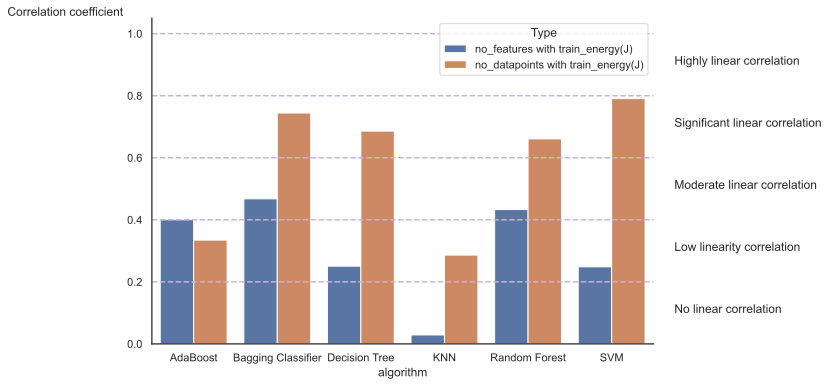

In [62]:
draw_Grouped_barplot(Turn_to_DF(**Parameters),Interval=True)